In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-03-24 05:01:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.006s  

2019-03-24 05:01:30 (3.77 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [4]:
#Load Data From CSV File

df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
#load testing data

!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-03-24 05:01:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-03-24 05:01:59 (660 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [23]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [7]:

#working on training data
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# DATA INSIGHTS

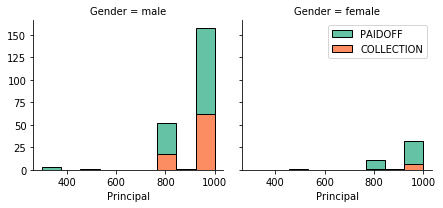

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=4)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [11]:
#Data encoding
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


In [12]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [15]:
X = df[['Principal','terms','age','Gender']]
X = pd.concat([X,pd.get_dummies(df['education'])], axis=1)
X.drop(['Master or Above'], axis = 1,inplace=True)
X.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


In [16]:
y = df['loan_status'].values


In [17]:
#Normalize features
X= preprocessing.StandardScaler().fit(X).transform(X)

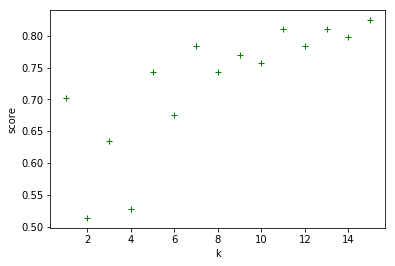

The best k value is 15


In [18]:
#KNN Classification

#import classifier

from sklearn.neighbors import KNeighborsClassifier

#split train/test data

mask = np.random.rand(len(X)) < .8

xtrain = X[mask]
xtest = X[~mask]

ytrain = y[mask]
ytest = y[~mask]


#loop over k to try for different values of k

k = np.arange(1, 16, 1)
scores = []

for i in k:
    clf = KNeighborsClassifier(i)
    clf = clf.fit(xtrain, ytrain)
    scores.append(clf.score(xtest, ytest)) #save the score of the prediction depending on k
    
    
#visualize results and find best k

plt.plot(k, scores, 'g+')
plt.xlabel('k')
plt.ylabel('score')
plt.show()

bestk = np.argmax(scores)+1
print('The best k value is', bestk) #the algorithm will be trained again with this k at the bottom to evaluate it    

In [24]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#preprocessing as done above with the test data

test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

testfeature = test_df[['Principal','terms','age','Gender']]
testfeature = pd.concat([testfeature,pd.get_dummies(test_df['education'])], axis=1)
testfeature.drop(['Master or Above'], axis = 1,inplace=True)

X_testing = preprocessing.StandardScaler().fit_transform(testfeature)
y_testing = test_df['loan_status'].values



#KNN
c_knn = KNeighborsClassifier(bestk)
c_knn = c_knn.fit(X, y)
pred_knn = c_knn.predict(X_testing)
knn_J = jaccard_similarity_score(y_testing, pred_knn)
knn_F1 = f1_score(y_testing, pred_knn, average='weighted')
print('KNN Jaccard:', knn_J, '; KNN F1:', knn_F1)



KNN Jaccard: 0.740740740741 ; KNN F1: 0.630417651694


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
#import classifier

from sklearn.tree import DecisionTreeClassifier

#train classifier

c_tree = DecisionTreeClassifier()
c_tree = c_tree.fit(X, y)
#make a prediction

y_hat = c_tree.predict(X)
y_hat


#Decision Tree
pred_tree = c_tree.predict(X_testing)
tree_J = jaccard_similarity_score(y_testing, pred_tree)
tree_F1 = f1_score(y_testing, pred_tree, average='weighted')
print('Decision Tree Jaccard:', tree_J, '; Decision Tree F1:', tree_F1)



Decision Tree Jaccard: 0.703703703704 ; Decision Tree F1: 0.6860670194


In [26]:
#import classifier

from sklearn.svm import SVC

#train classifier

c_svm = SVC()
c_svm = c_svm.fit(X, y)
c_svm

#make a prediction

y_hat = c_svm.predict(X)
y_hat


#SVM
pred_svm = c_svm.predict(X_testing)
svm_J = jaccard_similarity_score(y_testing, pred_svm)
svm_F1 = f1_score(y_testing, pred_svm, average='weighted')
print('SVM Jaccard:', svm_J, '; SVM F1:', svm_F1)



SVM Jaccard: 0.740740740741 ; SVM F1: 0.630417651694


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
#import classifier

from sklearn.linear_model import LogisticRegression

#train classifier

c_log = LogisticRegression()
c_log = c_log.fit(X, y)
c_log

#make a prediction

y_hat = c_log.predict(X)
y_hat

#Logistic Regression
pred_log = c_log.predict(X_testing)
probs_log = c_log.predict_proba(X_testing)
log_J = jaccard_similarity_score(y_testing, pred_log)
log_F1 = f1_score(y_testing, pred_log, average='weighted')
log_logloss = log_loss(y_testing, probs_log)
print('Logistic Regression Jaccard:', log_J, '; Logistic Regression F1:', log_F1, '; LogLoss:', log_logloss)

Logistic Regression Jaccard: 0.740740740741 ; Logistic Regression F1: 0.630417651694 ; LogLoss: 0.583827265895


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
